# Heller, Heller, Gorfine (HHG)

In this tutorial, we explore

- The theory behind the HHG test statistic and p-value
- The features of the implementation

## Theory

|                                                           | $d_{\mathbf{x}}(x_i,\cdot) \leq d_{\mathbf{x}}(x_i,x_j)$ | $d_{\mathbf{x}}(x_i,\cdot) > d_{\mathbf{x}}(x_i,x_j)$ |                    |
| :-------------------------------------------------------: | :---------------------------------------------------------------: | :---------------------------------------------------: | :----------------: |
| $d_{\mathbf{y}}(y_i,\cdot) \leq d_{\mathbf{y}}(y_i, y_j)$ | $A_{11}(i, j)$                                                    | $A_{12}(i, j)$                                        | $A_{1\cdot}(i, j)$ |
| $d_{\mathbf{y}}(y_i,\cdot) > d_{\mathbf{y}}(y_i, y_j)$    | $A_{21}(i, j)$                                                    | $A_{22}(i, j)$                                        | $A_{2\cdot}(i, j)$ |
|                                                           | $A_{\cdot 1}(i, j)$                                                | $A_{\cdot 2}(i, j)$                                   | $n-2$              |

The following description is adapted from [[1]](https://arxiv.org/abs/1907.02088):

HHG is a consistent multivariate test of associations based on the rank of the distances [[2]](https://academic.oup.com/biomet/article-abstract/100/2/503/202568). For every sample point $j \neq i$, denote a point in the joint sample space as $(x_j, y_j)$. Let $d_{\mathbf{x}} (x_i, x_j)$ be equivalent to the norm distance between samples $x_i$ and $x_j$ and $d_{\mathbf{y}} (y_i, y_j)$ is similarly defined. The indicator function is denoted by $\mathbb{I} \{ \cdot \}$. The cross-classification between these two random variables can be formulated as in the above table, where

$$ A_{11} = \sum_{k = 1, k \neq i, j}^n \mathbb{I} \left\{ d_{\mathbf{x}} (x_i, x_k) \leq d_{\mathbf{x}} (x_i, x_j) \right\} \mathbb{I} \left\{ d_{\mathbf{y}} (y_i, y_k) \leq d_{\mathbf{y}} (y_i, y_j) \right\},$$

and $A_{12}$, $A_{21}$, and $A_{22}$ are defined similarly. $A_{\cdot 1}$, $A_{\cdot 2}$, $A_{1 \cdot}$, and $A_{2 \cdot}$ are the sums of the columns and rows respectively.

Once this table is generated, the Pearson's chi square test statistic can be calculated using
$$S (i, j) = \frac{(n - 2) {\left( A_{12} A_{21} - A_{11} A_{22} \right)}^2}{A_{1 \cdot} A_{2 \cdot} A_{\cdot 1} A_{\cdot 2}}.$$

From here, the HHG test statistic is simply

$$\mathrm{HHG}_n = \sum_{i = 1}^n \sum_{j = 1, j \neq i}^n S (i, j).$$

The p-value is then calculated using a standard permutation test.

## Using HHG

Before delving straight into function calls, let's first import some useful functions, to ensure consistency in these examples, we set the seed:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set(style="white")

from mgcpy.independence_tests.hhg import HHG
from mgcpy.benchmarks import simulations as sims

np.random.seed(12345678)

To start, let's simulate some linear data:

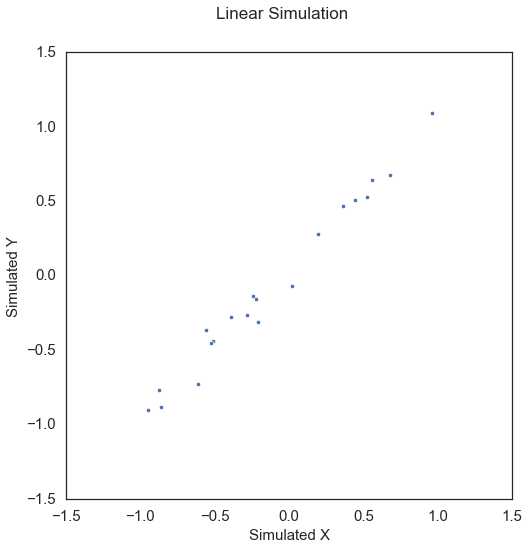

In [2]:
x, y = sims.linear_sim(num_samp=20, num_dim=1, noise=0.1)

fig = plt.figure(figsize=(8,8))
fig.suptitle("Linear Simulation", fontsize=17)
ax = sns.scatterplot(x=x[:,0], y=y[:,0])
ax.set_xlabel('Simulated X', fontsize=15)
ax.set_ylabel('Simulated Y', fontsize=15) 
plt.axis('equal')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The test statistic and p-value can be called by creating the `HHG` object and simply calling the corresponding test statistic and p-value methods.

In [3]:
hhg = HHG()
hhg_statistic, independence_test_metadata = hhg.test_statistic(x, y)
p_value, _ = hhg.p_value(x, y)

print("HHG test statistic:", hhg_statistic)
print("P Value:", p_value)

HHG test statistic: 3996.8554895896664
P Value: 0.001


Because HHG is uses a permutation test, the p-value is bounded by the number of repetitions (in this case 1000). This is because since we are estimating the null distribution via permutation, this is the lowest value that we can be sufficiently sure is the p-value. It is worth noting that as in most of the other tests that use permutation to approximate the p-value, the `replication_factor` parameter can be set to the desired number.